In [1]:
import numpy as np

def diurnal_model(t: float, N:int = 8760, T: float = 24, A: list = (0,0,0,0), B: list = (0,0,0,0)):
    # N = 8760 for hours in a year (24x365)
    # T = mean annual hourly temperature
    # Ai Bi amplitude coefficients for each harmonic
    period = 360/N
    return T + A[0]*np.sin(period*t) + B[0]*np.cos(period*t) + \
               A[1]*np.sin(2*period*t*365) + B[1]*np.cos(2*period*t*365) + \
               A[2]*np.sin(3*period*t*730) + B[2]*np.cos(3*period*t*730) + \
               A[3]*np.sin(4*period*t*1095) + B[3]*np.cos(4*period*t*1095)

def markov_model(prev_x: float, p: float):
    # p = E(x_t | x_t-1)
    return p*prev_x + (1-p**2)**0.5*np.random.normal()

In [24]:
import matplotlib.pyplot as plt

time = np.linspace(0, 8760, 1000000)

temperatures = []
T = 59.72 # mean annual temperature
for t in time:
    temperatures.append(diurnal_model(t, T=T, A=(-5.4, -10.1, 2.19, 0.56), B=(-19.86, -4.88, 0.52, -0.34)))

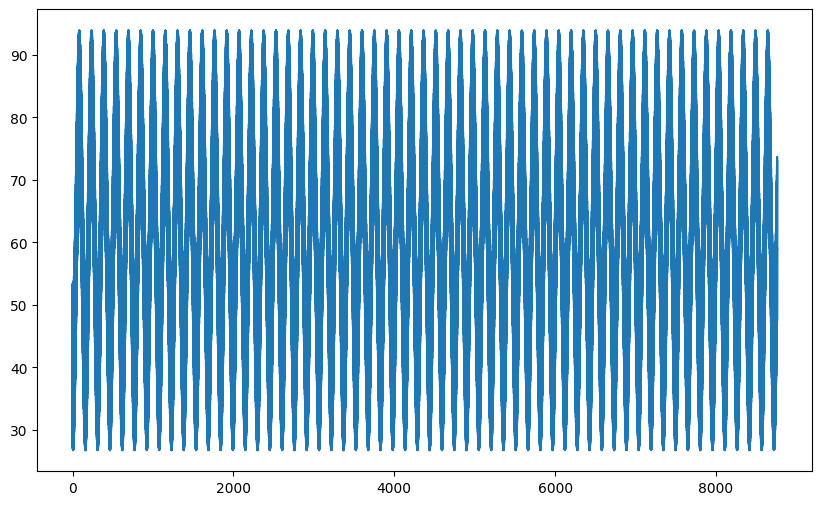

In [25]:
plt.figure(figsize=(10,6))
# plt.xticks(np.arange(0, days*24, 24), np.arange(0, days, 1))
plt.plot(time, temperatures)